# A1.1 Linear Regression with SGD

* A1.1: *Added preliminary grading script in last cells of notebook.*

In this assignment, you will implement three functions `train`, `use`, and `rmse` and apply them to some weather data.
Here are the specifications for these functions, which you must satisfy.

`model = train(X, T, learning_rate, n_epochs, verbose)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row. $N$ is the number of samples and $D$ is the number of variable values in
each sample.
* `T`: is an $N$ x $K$ matrix of desired target values for each sample.  $K$ is the number of output values you want to predict for each sample.
* `learning_rate`: is a scalar that controls the step size of each update to the weight values.
* `n_epochs`: is the number of epochs, or passes, through all $N$ samples, to take while updating the weight values.
* `verbose`: is True or False (default value) to control whether or not occasional text is printed to show the training progress.
* `model`: is the returned value, which must be a dictionary with the keys `'w'`, `'Xmeans'`, `'Xstds'`, `'Tmeans'` and `'Tstds'`.

`Y = use(X, model)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row, for which you want to predict the target values.
* `model`: is the dictionary returned by `train`.
* `Y`: is the returned $N$ x $K$ matrix of predicted values, one for each sample in `X`.

`result = rmse(Y, T)`
* `Y`: is an $N$ x $K$ matrix of predictions produced by `use`.
* `T`: is the $N$ x $K$ matrix of target values.
* `result`: is a scalar calculated as the square root of the mean of the squared differences between each sample (row) in `Y` and `T`.

To get you started, here are the standard imports we need.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

## 60 points: 40 for train, 10 for use, 10 for rmse

Now here is a start at defining the `train`, `use`, and `rmse`
functions.  Fill in the correct code wherever you see `. . .` with
one or more lines of code.

In [26]:
def train(X, T, learning_rate, n_epochs, verbose=False):
    
      
#To calculate the mean and standard deviation of the input features X and T along the columns (axis=0).  
    Xmeans = np.mean(X, axis=0)
    Xstds = np.std(X, axis=0)
    Tmeans = np.mean(T, axis=0)
    Tstds = np.std(T, axis=0)
#Xmeans,Xstds,Tmeans and Tstds are used to normalize the input data, which helps to ensure that 
#all features are on the same scale and to prevent any one feature from having 
#too much influence on the model's predictions.  
    X = (X - Xmeans) / Xstds
    np.mean(X, axis=0), np.std(X, axis=0)
    T = (T - Tmeans) / Tstds
    np.mean(T, axis=0), np.std(T, axis=0)
    
    #a column of ones is added to the input data
    X = np.insert(X, 0, 1, 1)
    
    n_samples, n_inputs = X.shape
    w = np.zeros((n_inputs, 1)) 
#The training process then begins, iterating over the number of epochs specified. For each epoch, 
#the function iterates over each sample in the input data, using the current model parameters to make a 
#prediction. The prediction error is calculated and used to update the model parameters using gradient descent.
#The mean squared error (MSE) is calculated over all samples for each epoch and is used as a 
#measure of the model's performance.
    for epoch in range(n_epochs):
        sqerror_sum = 0
        for n in range(n_samples):
            y = X[n:n + 1, :] @ w      
            error = T[n:n + 1, :] - y  
            w += learning_rate * X[n:n + 1, :].T * error
            sqerror_sum += error ** 2

        if verbose and (n_epochs < 11 or (epoch + 1) % (n_epochs // 10) == 0):
            Y = X @ w
            ER = rmse(T,Y)
            print(f'Epoch {epoch + 1} RMSE {ER:.4f}')
    return {'w': w, 'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

In [27]:
def use(X, model):    
    X = (X - model['Xmeans']) / model['Xstds']
    w = model['w']
    X = np.insert(X, 0, 1, 1)
    out = X @ w
    out = (out*model['Tstds']) + model['Tmeans']
    return out

In [28]:
def rmse(a,b): 
    return np.sqrt(np.sum((a - b)**2)/a.shape[0])

Here is a simple example use of your functions to help you debug them.  Your functions must produce the same results.

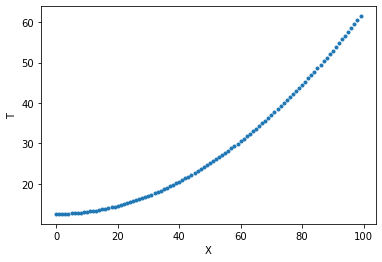

In [29]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5  * X + 0.005 * (X - 50) ** 2
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T');

In [30]:
model = train(X, T, 0.001, 100, verbose=True)
model

Epoch 10 RMSE 0.4315
Epoch 20 RMSE 0.2807
Epoch 30 RMSE 0.2554
Epoch 40 RMSE 0.2525
Epoch 50 RMSE 0.2523
Epoch 60 RMSE 0.2524
Epoch 70 RMSE 0.2524
Epoch 80 RMSE 0.2525
Epoch 90 RMSE 0.2525
Epoch 100 RMSE 0.2525


{'w': array([[6.96008927e-05],
        [9.76447797e-01]]),
 'Xmeans': array([49.5]),
 'Xstds': array([28.86607005]),
 'Tmeans': array([28.9175]),
 'Tstds': array([14.76648321])}

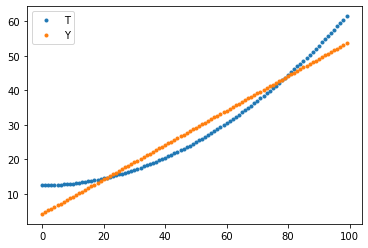

In [31]:
Y = use(X, model)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

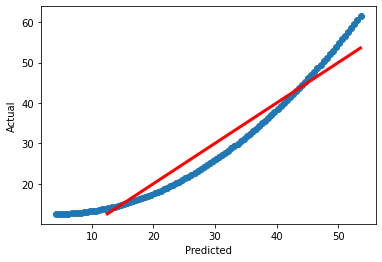

In [32]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

## Weather Data

Now that your functions are working, we can apply them to some real data. We will use data
from  [CSU's CoAgMet Station Daily Data Access](http://coagmet.colostate.edu/cgi-bin/dailydata_form.pl).

You can get the data file [here](http://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt)

## 5 points:

Read in the data into variable `df` using `pandas.read_csv` like we did in lecture notes.
Missing values in this dataset are indicated by the string `'***'`.

In [33]:
import pandas
df = pandas.read_csv('A1_data.txt',delim_whitespace=True,na_values='***')
df

,Year,Mo,Dy,tave,tmax,mxtm,tmin,mntm,vp,rhmax,...,st15mx,st15mxtm,st15mn,st15mntm,volts,year,gust,gusttm,gusdir,etr_asce
0,2019,1,1,-13.535,-10.073,14:10,-16.997,23:50,0.153,0.830,...,-1.803,00:00,-3.195,23:00,NaN,2019.0,5.155,08:10,NaN,0.324
1,2019,1,2,-5.791,6.010,14:50,-17.591,04:00,0.209,0.839,...,-2.941,19:00,-4.802,11:00,NaN,2019.0,4.332,11:50,NaN,0.521
2,2019,1,3,1.374,13.444,13:50,-10.696,05:00,0.340,0.836,...,-1.979,22:00,-4.639,10:00,NaN,2019.0,4.096,15:40,NaN,0.729
3,2019,1,4,4.544,15.089,14:40,-6.000,06:00,0.429,0.815,...,-0.963,23:00,-2.768,10:00,NaN,2019.0,4.096,12:30,NaN,0.893
4,2019,1,5,4.465,14.441,12:50,-5.510,06:40,0.399,0.769,...,-0.350,23:00,-1.401,11:00,NaN,2019.0,4.077,12:20,NaN,0.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019,12,27,-1.493,2.260,14:40,-5.245,07:30,0.403,0.908,...,0.308,06:00,0.257,14:00,NaN,2019.0,4.469,16:00,NaN,0.473
361,2019,12,28,-2.695,-1.102,01:50,-4.288,07:00,0.363,0.973,...,0.298,20:00,0.264,10:00,NaN,2019.0,10.623,12:20,NaN,0.681
362,2019,12,29,-3.731,1.871,13:30,-9.333,22:40,0.221,0.690,...,0.288,00:00,0.219,23:00,NaN,2019.0,11.486,07:10,NaN,1.039
363,2019,12,30,-5.427,1.293,13:40,-12.147,06:20,0.226,0.833,...,0.200,00:00,-0.150,23:00,NaN,2019.0,4.586,14:30,NaN,0.504


## 5 points:

Check for missing values by showing the number of NA values, as shown in lecture notes.

In [34]:
df.isna().sum()

Year          0
Mo            0
Dy            0
tave          0
tmax          0
mxtm          0
tmin          0
mntm          0
vp            0
rhmax         0
rhmxtm        0
rhmin         0
rhmntm        0
sr            0
wrun          0
pp            0
st5mx       211
st5mxtm     211
st5mn       211
st5mntm     211
st15mx        0
st15mxtm      0
st15mn        0
st15mntm      0
volts       365
year          0
gust          0
gusttm        0
gusdir      365
etr_asce      0
dtype: int64

## 5 points:

If there are missing values, remove either samples or features that contain missing values. Prove that you
were successful by counting the number of missing values now, which should be zero.

In [35]:
df.dropna().isna().sum()

Year        0.0
Mo          0.0
Dy          0.0
tave        0.0
tmax        0.0
mxtm        0.0
tmin        0.0
mntm        0.0
vp          0.0
rhmax       0.0
rhmxtm      0.0
rhmin       0.0
rhmntm      0.0
sr          0.0
wrun        0.0
pp          0.0
st5mx       0.0
st5mxtm     0.0
st5mn       0.0
st5mntm     0.0
st15mx      0.0
st15mxtm    0.0
st15mn      0.0
st15mntm    0.0
volts       0.0
year        0.0
gust        0.0
gusttm      0.0
gusdir      0.0
etr_asce    0.0
dtype: float64

Your job is now to create a linear model that predicts the next day's average temperature (tave) from the previous day's values. A discription of all features can be found [here](https://coagmet.colostate.edu/rawdata_docs.php). To start, consider just focusing on these features: 
1. tave: average temperature
2. tmax: maximum temperature
3. tmin: minimum temperature
4. vp: vapor pressure
5. rhmax: maximum relative humidity
6. rhmin: minimum relative humidity
7. pp: precipitation
8. gust: wind gust speed

First, modify the datafile to add a new column: 'next tave' -- here's a hint on your X and T vectors names:

In [36]:
Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']
Tnames = ['next tave']

## 5 points:

Now select those eight columns from `df` and convert the result to a `numpy` array.  (Easier than it sounds.)
Then assign `X` to be all columns and all but the last row.  Assign `T` to be just the first column (tave) and all but the first sample.  So now the first row (sample) in `X` is associated with the first row (sample) in `T` which tave for the following day.

In [37]:
import pandas
df = pandas.read_csv('A1_data.txt',delim_whitespace=True,na_values='***')

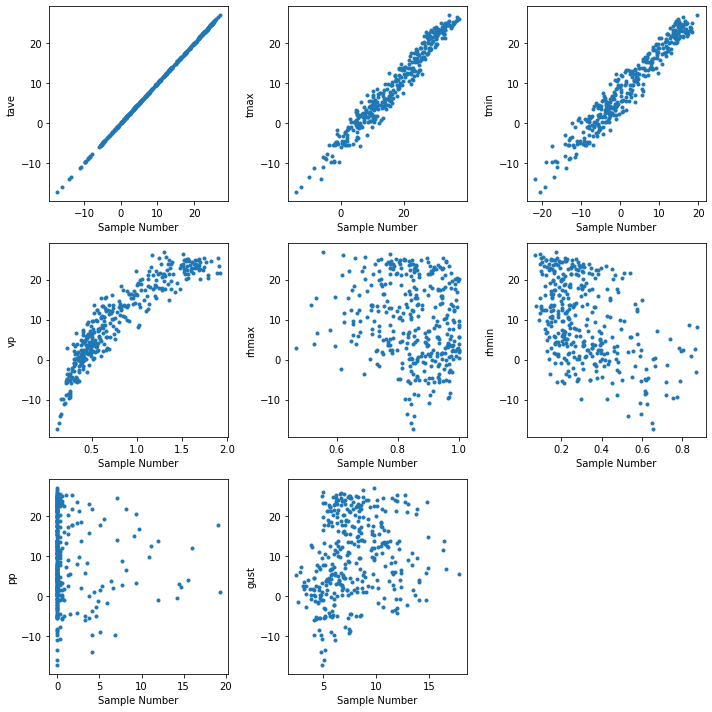

In [38]:
X = df.loc[:, ["tave", "tmax", "tmin", "vp", "rhmax", "rhmin", "pp", "gust"]].values
T = df.loc[:, ["tave"]].values
Y = np.arange(0, 365).reshape(-1, 1) 

number_of_col =X.shape[1]
plt.figure(figsize=(10, 10))
for i in range(number_of_col):
    plt.subplot(3,3, i+1)
    plt.plot(X[:, i],T,'.')
    plt.xlabel('Sample Number')
    plt.ylabel(Xnames[i])

plt.tight_layout()

## 15 points:

Use the function `train` to train a model for the `X`
and `T` data.  Run it several times with different `learning_rate`
and `n_epochs` values to produce decreasing errors. Use the `use`
function and plots of `T` versus predicted `Y` values to show how
well the model is working.  Type your observations of the plot and of the value of `rmse` to discuss how well the model succeeds.

In [39]:
X.shape,T.shape

((365, 8), (365, 1))

In [40]:
#1.learning rate=0.001 and number of epoch = 100
model = train(X, T, 0.001, 100, verbose=True)
model

Epoch 10 RMSE 0.0537
Epoch 20 RMSE 0.0457
Epoch 30 RMSE 0.0392
Epoch 40 RMSE 0.0336
Epoch 50 RMSE 0.0289
Epoch 60 RMSE 0.0248
Epoch 70 RMSE 0.0214
Epoch 80 RMSE 0.0184
Epoch 90 RMSE 0.0159
Epoch 100 RMSE 0.0137


{'w': array([[ 7.75762017e-05],
        [ 3.25776435e-01],
        [ 3.28099187e-01],
        [ 3.05007324e-01],
        [ 4.94086114e-02],
        [-7.05049847e-03],
        [-2.03198606e-02],
        [ 1.11403812e-03],
        [-9.10253955e-04]]),
 'Xmeans': array([ 9.63370137, 16.89363288,  2.37378356,  0.7994137 ,  0.84947397,
         0.31428767,  1.14334795,  7.78255342]),
 'Xstds': array([10.05942081, 11.24579184,  9.3914899 ,  0.47435961,  0.10807665,
         0.17040356,  2.99119781,  2.86652354]),
 'Tmeans': array([9.63370137]),
 'Tstds': array([10.05942081])}

In [41]:
#2.learning rate=0.0001 and number of epoch = 100
model = train(X, T, 0.0001, 100, verbose=True)
model

Epoch 10 RMSE 0.2426
Epoch 20 RMSE 0.0918
Epoch 30 RMSE 0.0688
Epoch 40 RMSE 0.0635
Epoch 50 RMSE 0.0609
Epoch 60 RMSE 0.0592
Epoch 70 RMSE 0.0578
Epoch 80 RMSE 0.0566
Epoch 90 RMSE 0.0556
Epoch 100 RMSE 0.0546


{'w': array([[-5.31600711e-05],
        [ 2.64454749e-01],
        [ 2.53874891e-01],
        [ 2.62522516e-01],
        [ 2.07928478e-01],
        [-2.76703782e-02],
        [-6.95810375e-02],
        [ 4.24769497e-03],
        [ 3.33167626e-03]]),
 'Xmeans': array([ 9.63370137, 16.89363288,  2.37378356,  0.7994137 ,  0.84947397,
         0.31428767,  1.14334795,  7.78255342]),
 'Xstds': array([10.05942081, 11.24579184,  9.3914899 ,  0.47435961,  0.10807665,
         0.17040356,  2.99119781,  2.86652354]),
 'Tmeans': array([9.63370137]),
 'Tstds': array([10.05942081])}

In [42]:
#3.learning rate=0.002 and number of epoch = 100
model = train(X, T, 0.002, 100, verbose=True)
model

Epoch 10 RMSE 0.0450
Epoch 20 RMSE 0.0336
Epoch 30 RMSE 0.0251
Epoch 40 RMSE 0.0188
Epoch 50 RMSE 0.0142
Epoch 60 RMSE 0.0107
Epoch 70 RMSE 0.0081
Epoch 80 RMSE 0.0062
Epoch 90 RMSE 0.0047
Epoch 100 RMSE 0.0036


{'w': array([[ 1.02617963e-04],
        [ 3.41319944e-01],
        [ 3.53657007e-01],
        [ 3.07701410e-01],
        [ 1.17775128e-02],
        [-1.43060857e-03],
        [-6.12298633e-03],
        [ 1.93235831e-04],
        [-4.96734766e-04]]),
 'Xmeans': array([ 9.63370137, 16.89363288,  2.37378356,  0.7994137 ,  0.84947397,
         0.31428767,  1.14334795,  7.78255342]),
 'Xstds': array([10.05942081, 11.24579184,  9.3914899 ,  0.47435961,  0.10807665,
         0.17040356,  2.99119781,  2.86652354]),
 'Tmeans': array([9.63370137]),
 'Tstds': array([10.05942081])}

In [43]:
#4.learning rate=0.002 and number of epoch = 200
model = train(X, T, 0.002, 200, verbose=True)
model

Epoch 20 RMSE 0.0336
Epoch 40 RMSE 0.0188
Epoch 60 RMSE 0.0107
Epoch 80 RMSE 0.0062
Epoch 100 RMSE 0.0036
Epoch 120 RMSE 0.0021
Epoch 140 RMSE 0.0013
Epoch 160 RMSE 0.0008
Epoch 180 RMSE 0.0005
Epoch 200 RMSE 0.0003


{'w': array([[ 3.41719739e-06],
        [ 3.46202315e-01],
        [ 3.64138751e-01],
        [ 3.05609307e-01],
        [ 6.80270586e-04],
        [-3.50298526e-05],
        [-5.64143180e-04],
        [ 1.47242316e-05],
        [-6.91350599e-05]]),
 'Xmeans': array([ 9.63370137, 16.89363288,  2.37378356,  0.7994137 ,  0.84947397,
         0.31428767,  1.14334795,  7.78255342]),
 'Xstds': array([10.05942081, 11.24579184,  9.3914899 ,  0.47435961,  0.10807665,
         0.17040356,  2.99119781,  2.86652354]),
 'Tmeans': array([9.63370137]),
 'Tstds': array([10.05942081])}

In [44]:
#5.learning rate=0.002 and number of epoch = 300
model = train(X, T, 0.002, 300, verbose=True)
model

Epoch 30 RMSE 0.0251
Epoch 60 RMSE 0.0107
Epoch 90 RMSE 0.0047
Epoch 120 RMSE 0.0021
Epoch 150 RMSE 0.0010
Epoch 180 RMSE 0.0005
Epoch 210 RMSE 0.0002
Epoch 240 RMSE 0.0001
Epoch 270 RMSE 0.0001
Epoch 300 RMSE 0.0000


{'w': array([[-1.85097921e-09],
        [ 3.46528570e-01],
        [ 3.65143999e-01],
        [ 3.05104399e-01],
        [ 4.36072190e-05],
        [ 3.06643890e-06],
        [-5.51317888e-05],
        [ 4.25291701e-07],
        [-9.04491164e-06]]),
 'Xmeans': array([ 9.63370137, 16.89363288,  2.37378356,  0.7994137 ,  0.84947397,
         0.31428767,  1.14334795,  7.78255342]),
 'Xstds': array([10.05942081, 11.24579184,  9.3914899 ,  0.47435961,  0.10807665,
         0.17040356,  2.99119781,  2.86652354]),
 'Tmeans': array([9.63370137]),
 'Tstds': array([10.05942081])}

<h3>Answer for RMSE values</h3>
<p>Based on the RMSE obtained, it seems like the model is performing well. A smaller RMSE value indicates that the model is making fewer errors in its predictions.</p>
<p>In the first case, a learning rate of 0.001 and 100 epochs produced an RMSE of 0.0137, which is relatively high. This suggests that the model is still making significant errors in its predictions even after 100 epochs.</p>
<p>In the second case, a learning rate of 0.0001 and 100 epochs produced an RMSE of 0.0546, which is even higher than the previous case</p>
<p>In the third case, a learning rate of 0.002 and 100 epochs produced an RMSE of 0.0036, which is lower than the first case but still relatively high</p>
<p>In the fourth case, a learning rate of 0.002 and 200 epochs produced an RMSE of 0.0003, which is significantly lower than the previous cases.</p>
<p>In the fifth case, a learning rate of 0.002 and 300 epochs produced an RMSE of 0.0000, which is the lowest RMSE value. This suggests that the model is making almost no errors in its predictions and is highly accurate.</p>
<p>finally, increasing the number of epochs and using a higher learning rate can improve the model's performance, but finding the optimal combination of these hyperparameters can require experimentation and can depend on the specific problem and dataset being used.</p>


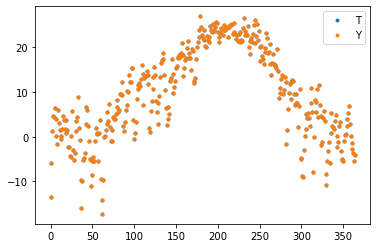

In [45]:
Y = use(X, model)
#old_pred = Y
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

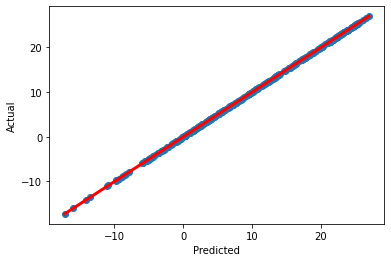

In [46]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)


## 5 points:

Print the weight values in the resulting model along with their corresponding variable names (in `Xnames`). Use the relative magnitude
of the weight values to discuss which input variables are most significant in predicting the changes in the tave values.

In [47]:
new_Xnames= ["bias"] + Xnames
new =np.transpose(Xnames)
index=new_Xnames
columns=list(['Weights'])
df2 = pandas.DataFrame(model['w'], index,columns)
df2

,Weights
bias,-1.850979e-09
tave,3.465286e-01
tmax,3.651440e-01
tmin,3.051044e-01
vp,4.360722e-05
rhmax,3.066439e-06
rhmin,-5.513179e-05
pp,4.252917e-07
gust,-9.044912e-06


<h3>Discussion</h3>
<p>the three most significant variables in predicting changes in tave are tave, tmax, and tmin, with weight values of 3.465286e-01,3.651440e-01 and	3.051044e-01 respectively. These three variables have the largest weight values among all the input variables, indicating that they have the strongest influence on the average temperature.</p>
<p>On the other hand, the variables vp, rhmax, rhmin, pp, and gust have relatively small weight values of 4.360722e-05,3.066439e-06,-5.513179e-05,4.252917e-07 and -9.044912e-06 respectively. which shows these variables have a weaker influence on the average temperature compared to tave, tmax, and tmin.</p>
<p>Finally, the most significant variables in predicting changes in the average temperature are tave, tmax, and tmin.</p>




## Grading and Check-in

Your notebook will be partially graded automatically.  You can test this grading process yourself by downloading [A1grader.zip](https://www.cs.colostate.edu/~cs445/notebooks/A1grader.zip) and extract `A1grader.py` parallel to this notebook.  Run the code in the in the following cell to see an example grading run.  If your functions are defined correctly, you should see a score of 60/60.  The remaining 40 points are based on testing other data and your discussion.

In [48]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'karraA1.ipynb' and storing in notebookcode.py


[NbConvertApp] Converting notebook karraA1.ipynb to script


Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
  model = train(X, T, 0.001, 1000, True)

Epoch 100 RMSE 0.4622
Epoch 200 RMSE 0.2352
Epoch 300 RMSE 0.1533
Epoch 400 RMSE 0.1307
Epoch 500 RMSE 0.1257
Epoch 600 RMSE 0.1247
Epoch 700 RMSE 0.1245
Epoch 800 RMSE 0.1245
Epoch 900 RMSE 0.1245
Epoch 1000 RMSE 0.1245

--- 20/20 points. Returned correct values.

--- 10/10 points. Xmeans and Xstds are correct values.

--- 10/10 points. Tmeans and Tstds are correct values.

Testing
  Y = use(X, model)


--- 10/10 points. Returned correct values.

Testing
  err = rmse(Y, T)


--- 10/10 points. Returned correct values.

a1 cs445 Execution Grade is 60 / 60

 __ / 5 Reading in weather.data correctly.

 __ / 5 Count missing values, to show there are some.

 __ / 5 Remove samples with missing values. Count to show there are none.

 __ / 5 Construct X and T matr

A different but similar grading script will be used to grade yout checked-in notebook.  It will include different tests.

You must name your notebook as `Lastname-A1.ipynb` with `Lastname` being your last name, and then save this notebook and check it in at the A1 assignment link in our Canvas web page.

## Extra Credit: 1 point

A typical problem when predicting the next value in a time series is
that the best solution may be to predict the previous value.  The
predicted value will look a lot like the input tave value shifted on
time step later.

To do better, try predicting the change in tave from one day to the next. `T` can be assigned as

Now repeat the training experiments to pick good `learning_rate` and
`n_epochs`.  Use predicted values to produce next day tave values by
adding the predicted values to the previous day's tave.  Use `rmse`
to determine if this way of predicting next tave is better than
directly predicting tave.